In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
import os
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

from keras.optimizers import Adam

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

data_dir = '/home/ubuntu/data/iceberg'

import keras
print(keras.__version__)

Using TensorFlow backend.


2.1.1


In [64]:
train_datagen = ImageDataGenerator(
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip=True)


train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/iceberg/pngs/extraTrainData/',
        batch_size=30,
        shuffle=True,
        class_mode='categorical',
        target_size=(75,75),
        save_to_dir='/home/ubuntu/data/iceberg/pngs/extraTrainData/output')



Found 630 images belonging to 2 classes.


In [61]:
# Create simple test model
input_shape = (75, 75, 3)
num_classes = 2
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

sgd = optimizers.SGD(lr=0.00001)
model_simple = Model(outputs=x, inputs=classifier_input)
model_simple.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
model_simple.fit_generator(
        train_generator,
        steps_per_epoch=40,
        epochs=5)

Epoch 1/5
21/40 [==============>...............] - ETA: 2s - loss: 1.0960e-07 - acc: 1.0000- ETA: 2s - loss: 1.0960e-07 - acc: 1

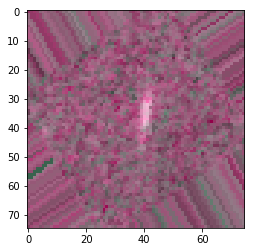

In [30]:
import imageio
import os
import matplotlib.pyplot as plt

files = os.listdir('/home/ubuntu/data/iceberg/pngs/extraTrainData/')
img = imageio.imread('/home/ubuntu/data/iceberg/pngs/extraTrainData/' + files[4] )
plt.imshow(img)
plt.show()

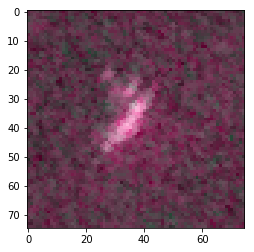

75.792118518518521

In [54]:
# test with one or two images to see what the augmentation is doing 

img = imageio.imread('/home/ubuntu/data/iceberg/pngs/train/train_iceberg_2.png')
plt.imshow(img)
plt.show()
img.mean()

In [35]:
test_datagen = ImageDataGenerator(
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip=True)


test_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/iceberg/pngs/test/',
        batch_size=30,
        shuffle=True,
        class_mode='categorical',
        target_size=(75,75),
        save_to_dir='/home/ubuntu/data/iceberg/pngs/test/output')

Found 1 images belonging to 2 classes.


In [37]:
model_simple.fit_generator(
        test_generator,
        steps_per_epoch=40,
        epochs=5)

Epoch 1/5
 1/40 [..............................] - ETA: 7s - loss: 1.0960e-07 - acc: 1.0000

In [52]:
files = os.listdir('/home/ubuntu/data/iceberg/pngs/test/output')
img = imageio.imread('/home/ubuntu/data/iceberg/pngs/test/output/' + files[3] )
plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/data/iceberg/pngs/test/output'